In [1]:
import torch
import sys
import os
from model import RNNTrainer,VanilaRNN,LSTMNetwork
import numpy as np

import matplotlib.pyplot as plt
#путь к корню директории
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.abspath(BASE_DIR))
from data_preparation import PreparationDataset
from show_analysis import LossVisualizer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [2]:
path = BASE_DIR + '\data_all'  # Путь к данным
PD = PreparationDataset(path)

# параметры подготовки данных
window_size=100
num_features=9
downsample_step=25 # 0.003 * downsample_step = шаг данных в секундах
target_window_size = 20 # output size количество выходных данных для 1 примера
# Подготовка данных
X, y, df = PD.many_to_many(
    window_size=window_size,
    num_features=num_features,
    downsample_step=downsample_step,
    target_window_size=target_window_size,
    device=device  
)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = PD.PDtrain_test_split(
    X, y, test_size=0.33, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([6303, 100, 9]),
 torch.Size([3105, 100, 9]),
 torch.Size([6303, 20]),
 torch.Size([3105, 20]))

In [4]:
input_size = X_train.shape[2]
output_size = 1
hidden_size = 512
num_layers = 1
dropout = 0.1
learning_rate = 0.1
model = LSTMNetwork( 
    input_size = input_size,
    output_size = output_size,
    hidden_size = hidden_size,
    #output_sw = target_window_size,
    num_layers = num_layers,
    dropout= dropout,
    device = device)

trainer = RNNTrainer(
    model=model,
    learning_rate=learning_rate,
    inf_per_epoch = 5,
    device= device
)


In [5]:
#возможность загрузитиь параметры в модель
# model.load_state_dict(torch.load('up_tree_weight.pth'))
# model = model.to(device)
#возможность сохранить параметры модели
#torch.save(model.state_dict(), 'Quantum_weight3.pth')

In [6]:
batch_size = 32
history = trainer.fit(
    X=X_train,
    y=y_train,
    X_t=X_test,
    y_t=y_test,
    batch_size=batch_size,
    epochs=2000,
    loss_tube=5,
)

c:\Users\nikit\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:999: UserWarning: Using a target size (torch.Size([32, 20])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.huber_loss(input, target, reduction=self.reduction, delta=self.delta)
c:\Users\nikit\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:999: UserWarning: Using a target size (torch.Size([31, 20])) that is different to the input size (torch.Size([31, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.huber_loss(input, target, reduction=self.reduction, delta=self.delta)
c:\Users\nikit\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:999: UserWarning: Using a target size (torch.Size([3105, 20])) that is different to the input size

Epoch 5
Main: 0.594762, MAPE: 0.160653, Tube: 0.212158
Test - Main: 0.607979, MAPE: 0.164915 Tube: 0.181481
Epoch 10
Main: 0.592089, MAPE: 0.160088, Tube: 0.206928
Test - Main: 0.607466, MAPE: 0.163007 Tube: 0.189597
Epoch 15
Main: 0.590360, MAPE: 0.158934, Tube: 0.209383
Test - Main: 0.615056, MAPE: 0.171042 Tube: 0.164911
Epoch 20
Main: 0.591378, MAPE: 0.159865, Tube: 0.214426
Test - Main: 0.612722, MAPE: 0.169500 Tube: 0.179694
Epoch 25
Main: 0.590391, MAPE: 0.159231, Tube: 0.205732
Test - Main: 0.611722, MAPE: 0.168800 Tube: 0.181208
Epoch 30
Main: 0.592251, MAPE: 0.159787, Tube: 0.209713
Test - Main: 0.608095, MAPE: 0.162068 Tube: 0.193929
Epoch 35
Main: 0.592241, MAPE: 0.159833, Tube: 0.207369
Test - Main: 0.608132, MAPE: 0.165149 Tube: 0.181014
Epoch 40
Main: 0.594041, MAPE: 0.160400, Tube: 0.208384
Test - Main: 0.610752, MAPE: 0.168035 Tube: 0.177166
Epoch 45
Main: 0.593043, MAPE: 0.160154, Tube: 0.210773
Test - Main: 0.607424, MAPE: 0.163913 Tube: 0.187633
Epoch 50
Main: 0.593

KeyboardInterrupt: 

In [14]:
from model_history import ModelHistory
MH = ModelHistory(history)
MH.save_history_json(filename = BASE_DIR+'\loss_history/all_loss.json',model_name = 'LSTM')
key = MH.add_result(
        filename = BASE_DIR+'\\resualt/main.json',
        model_name = 'LSTM',
        result = 'best',
        message = 'first',
        params = {'input_size' : X_train.shape[2],
                  'output_size': output_size,
                  'hidden_size': hidden_size,
                  'num_layers': num_layers,
                  'dropout':dropout,
                  'lr':learning_rate,
                  'batch_size':batch_size}
        )
print(f'доступ к рузультату в json файле по ключу: {key}')

'18eef062-3af1-4387-8b3a-37c91d2bbb0c'

In [15]:
LV = LossVisualizer(history)

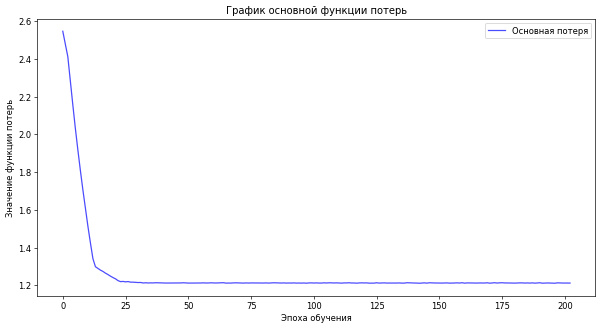

In [16]:
LV.show_training_loss()

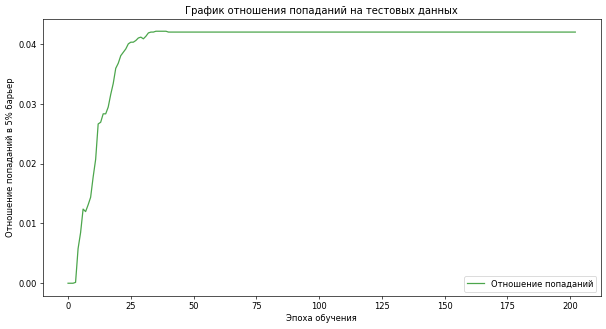

In [17]:
LV.show_test_tube()

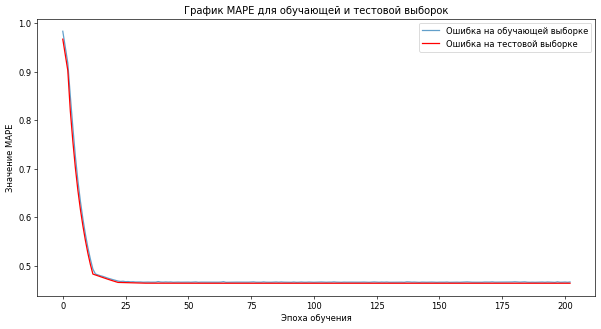

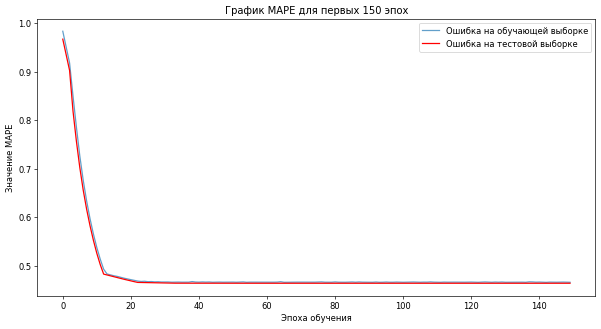

In [18]:
LV.show_mape()

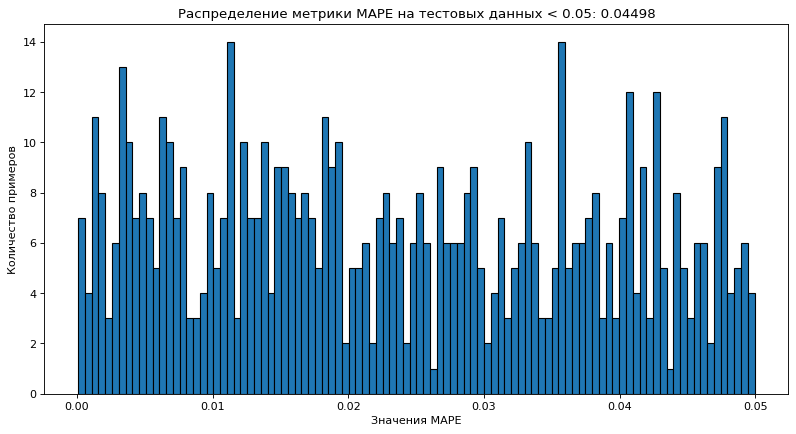

Процент значений MAPE < 0.05: 0.04498


In [19]:
LV.histogram_mape(model,X_train,y_train,limit_percel = 5)

In [20]:
LV.show_predictions_rnn(model,df,device)

Количество записей: 5334


TypeError: cannot unpack non-iterable torch.device object